In [124]:
#json 파일 합치기
import json
data1 = json.load(open('instagram_data_hwa_2gate.json', 'rb'))
data2 = json.load(open('instagram_data_hwa_4gate.json', 'rb'))
insta_dict = {'id':[],
              'location': [],
              'date': [],
              'like': [],
              'text': [],
              'hashtag': [],
              'img': []}

for i in insta_dict.keys():
    insta_dict[i] = data1[i] + data2[i]
    
with open('instagram_data_hwa_2-4gate.json', 'w') as f:
    json.dump(insta_dict, f, indent=4)

In [125]:
import json
from tqdm import tqdm
#Load in cookie
cookies = json.load(open('instagram_data_hwa_2-4gate.json', 'rb'))
#날짜 데이터 불러오기
dates = cookies["date"]

# 시간만 가져오기
hour_l = []
for i in tqdm(range(len(dates))):
    hour_l.append(dates[i][-8:-6])
    
print(hour_l)

100%|██████████████████████████████████████████████████████████████████████████████████████| 4490/4490 [00:00<?, ?it/s]

['12', '22', '01', '07', '05', '07', '10', '13', '00', '12', '12', '08', '02', '11', '11', '10', '06', '06', '09', '14', '12', '01', '16', '12', '09', '09', '05', '13', '12', '02', '11', '09', '06', '06', '15', '15', '09', '12', '10', '09', '02', '02', '11', '00', '06', '10', '00', '15', '15', '14', '05', '02', '10', '06', '07', '02', '08', '01', '09', '08', '05', '06', '06', '01', '07', '01', '12', '05', '00', '17', '07', '03', '02', '05', '03', '11', '05', '10', '13', '11', '04', '13', '09', '10', '00', '04', '13', '12', '04', '08', '08', '12', '11', '04', '15', '09', '11', '10', '04', '13', '03', '03', '05', '05', '05', '13', '13', '06', '08', '03', '15', '15', '15', '12', '11', '10', '09', '14', '13', '15', '14', '01', '04', '04', '04', '05', '09', '05', '14', '07', '20', '16', '15', '09', '03', '03', '00', '01', '01', '01', '12', '01', '16', '16', '14', '13', '12', '11', '11', '11', '11', '11', '10', '09', '15', '10', '08', '13', '06', '01', '13', '10', '10', '23', '23', '11', '10

In [126]:
from collections import Counter
#시간별 카운팅

count_hours = Counter(hour_l)
print(count_hours)

Counter({'13': 356, '10': 316, '11': 313, '12': 304, '14': 292, '09': 286, '08': 282, '03': 244, '05': 229, '06': 229, '04': 226, '07': 225, '15': 216, '23': 166, '02': 156, '00': 141, '01': 136, '16': 134, '17': 74, '22': 46, '18': 38, '21': 33, '19': 29, '20': 19})


In [127]:
# 2시간 주기
hours = count_hours.keys()
count_2hour = {}
for i in range(0, 23, 2):
    total = []
    if i < 10:
        hour = count_hours["0{}" .format(i)]
        total.append(hour)
    else:
        hour = count_hours["{}" .format(i)]
        total.append(hour)
    
    count_2hour["{}-{}" .format(i, i+1)] = sum(total)
                                
print(count_2hour)

{'0-1': 141, '2-3': 156, '4-5': 226, '6-7': 229, '8-9': 282, '10-11': 316, '12-13': 304, '14-15': 292, '16-17': 134, '18-19': 38, '20-21': 19, '22-23': 46}


In [128]:
# 6시간 주기
hours = count_hours.keys()
count_6hour = {}
for i in range(0, 23, 6):
    total = []
    if i < 10:
        hour = count_hours["0{}" .format(i)]
        total.append(hour)
    else:
        hour = count_hours["{}" .format(i)]
        total.append(hour)
    
    count_6hour["{}-{}" .format(i, i+6)] = sum(total)
    
print(count_6hour)

{'0-6': 141, '6-12': 229, '12-18': 304, '18-24': 38}


In [129]:
# 4시간 주기
hours = count_hours.keys()
count_4hour = {}
for i in range(0, 23, 4):
    total = []
    if i < 10:
        hour = count_hours["0{}" .format(i)]
        total.append(hour)
    else:
        hour = count_hours["{}" .format(i)]
        total.append(hour)
    
    count_4hour["{}-{}" .format(i, i+4)] = sum(total)
    
print(count_6hour)

{'0-6': 141, '6-12': 229, '12-18': 304, '18-24': 38}


In [130]:
#한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc

matplotlib.rcParams['font.family'] = 'SB_AGGRO_M'
print(matplotlib.rcParams['font.family'])

['SB_AGGRO_M']


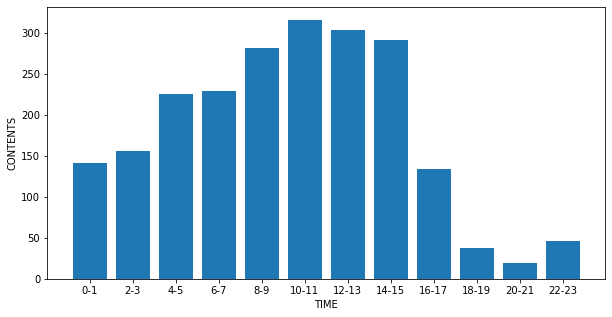

In [131]:
import matplotlib.pyplot as plt
#년 게시물 빈도수 그래프 그리기
#그래프 사이즈 지정
plt.figure(figsize=(10, 5))
#x,y축 네이밍
plt.xlabel('TIME')
plt.ylabel('CONTENTS')

# x,y축 데이터
x_label = count_2hour.keys()
y_label = count_2hour.values()

plt.bar(x_label, y_label)

plt.show()

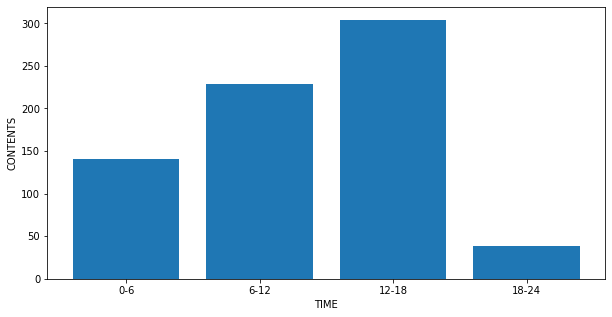

In [132]:
import matplotlib.pyplot as plt
#년 게시물 빈도수 그래프 그리기
#그래프 사이즈 지정
plt.figure(figsize=(10, 5))
#x,y축 네이밍
plt.xlabel('TIME')
plt.ylabel('CONTENTS')

# x,y축 데이터
x_label = count_6hour.keys()
y_label = count_6hour.values()

plt.bar(x_label, y_label)

plt.show()

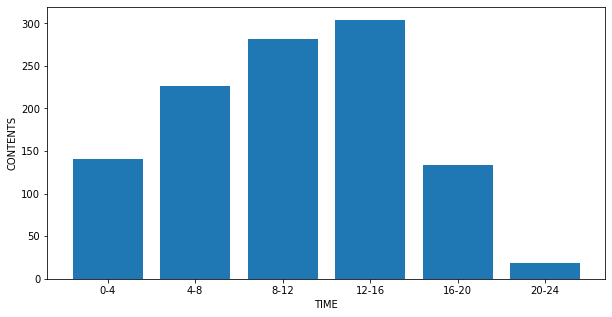

In [133]:
import matplotlib.pyplot as plt
#년 게시물 빈도수 그래프 그리기
#그래프 사이즈 지정
plt.figure(figsize=(10, 5))
#x,y축 네이밍
plt.xlabel('TIME')
plt.ylabel('CONTENTS')

# x,y축 데이터
x_label = count_4hour.keys()
y_label = count_4hour.values()

plt.bar(x_label, y_label)

plt.show()